## 3. 해당 데이터에서 Outcome을 삭제하고 BMI를 예측하는 회귀를 수행하라.

In [39]:
import pandas as pd
df = pd.read_csv("./diabetes.csv")
df=df.drop('Outcome',axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


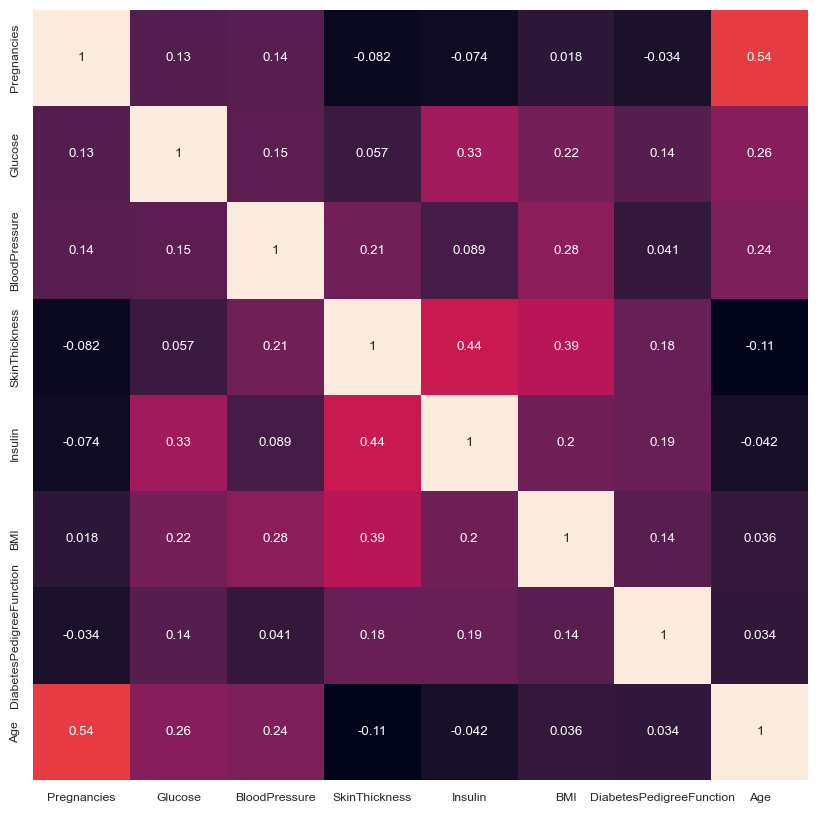

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# BMI랑 상관관계가 있는건 Skin Thickness

In [41]:
X = df.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [42]:
y = df['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 7) (614,)
(154, 7) (154,)


In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 51.57886634430024
평균제곱근오차 51.57886634430024
평균제곱근오차 51.57886634430022


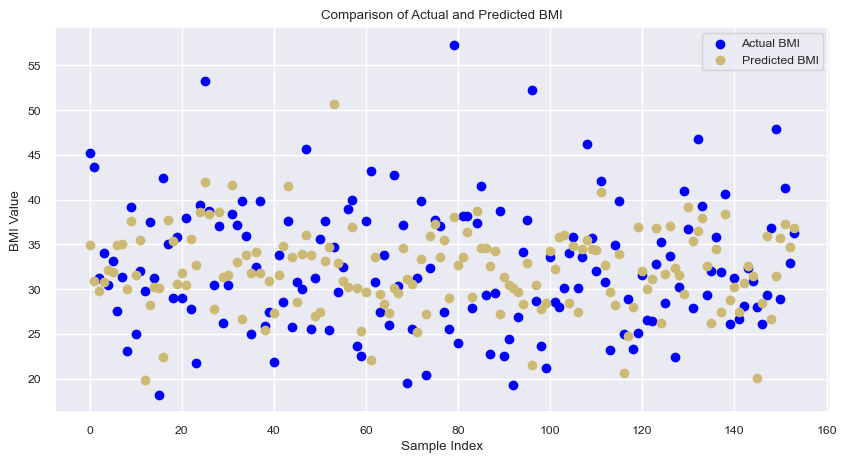

In [45]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
# 실제 값(y_test)과 예측 값(ly_preds) 비교
plt.scatter(range(len(y_test)), y_test, label='Actual BMI', color='blue')
plt.scatter(range(len(ly_preds)), ly_preds, c='y', label='Predicted BMI')

# 그래프 표시
plt.title('Comparison of Actual and Predicted BMI')
plt.xlabel('Sample Index')
plt.ylabel('BMI Value')
plt.legend()
plt.show()

In [46]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 99.93681818181817


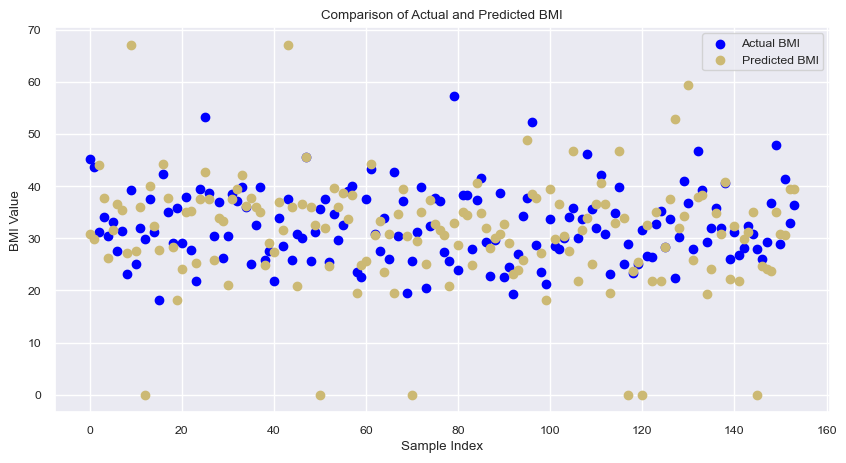

In [47]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
# 실제 값(y_test)과 예측 값(ly_preds) 비교
plt.scatter(range(len(y_test)), y_test, label='Actual BMI', color='blue')
plt.scatter(range(len(dy_preds)), dy_preds, c='y', label='Predicted BMI')

# 그래프 표시
plt.title('Comparison of Actual and Predicted BMI')
plt.xlabel('Sample Index')
plt.ylabel('BMI Value')
plt.legend()
plt.show()

In [48]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 41.69933157142855


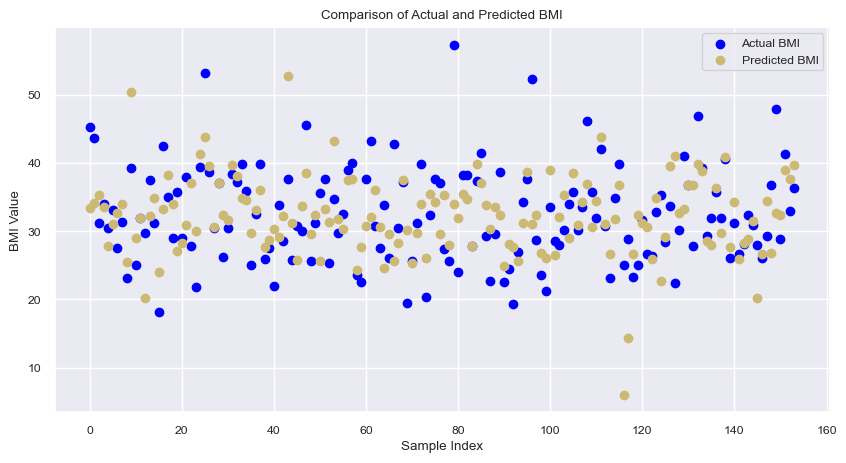

In [49]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
# 실제 값(y_test)과 예측 값(ly_preds) 비교
plt.scatter(range(len(y_test)), y_test, label='Actual BMI', color='blue')
plt.scatter(range(len(ry_preds)), ry_preds, c='y', label='Predicted BMI')

# 그래프 표시
plt.title('Comparison of Actual and Predicted BMI')
plt.xlabel('Sample Index')
plt.ylabel('BMI Value')
plt.legend()
plt.show()

In [50]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

svy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(svy_preds, y_test))

평균제곱근오차 49.07251213401918


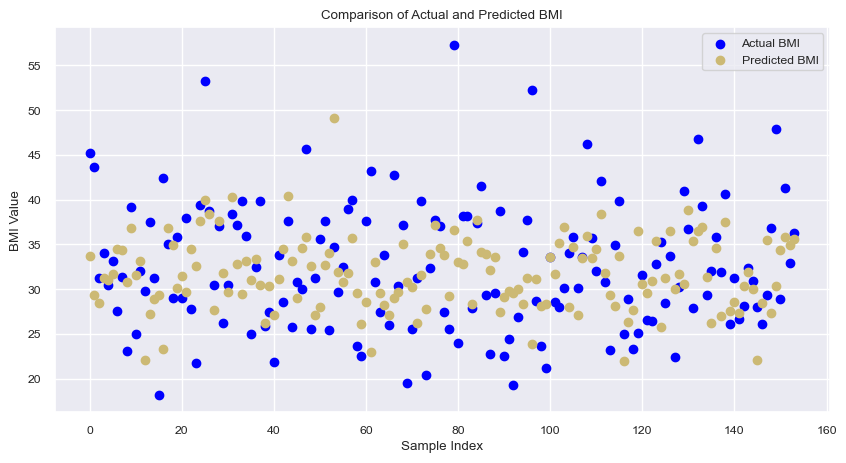

In [51]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
# 실제 값(y_test)과 예측 값(ly_preds) 비교
plt.scatter(range(len(y_test)), y_test, label='Actual BMI', color='blue')
plt.scatter(range(len(svy_preds)), svy_preds, c='y', label='Predicted BMI')

# 그래프 표시
plt.title('Comparison of Actual and Predicted BMI')
plt.xlabel('Sample Index')
plt.ylabel('BMI Value')
plt.legend()
plt.show()    